In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные вылаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых rлиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [2]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [3]:
data.shape

(10000, 11)

In [4]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


In [6]:
cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns

col_to_cat = ['Driving_License']
cat_cols = np.append(cat_cols, col_to_cat)
num_cols = list(set(num_cols) - set(col_to_cat))

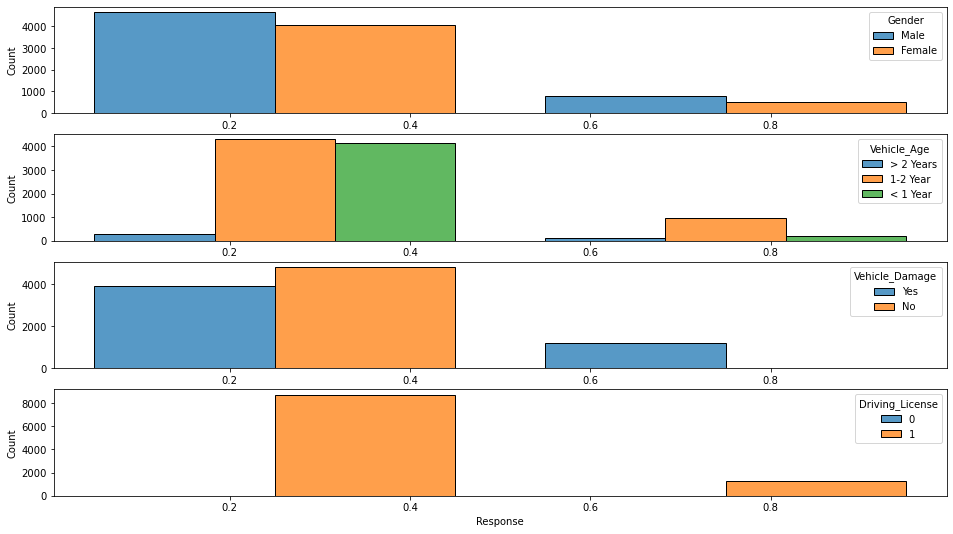

In [8]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 9
fig, axes = plt.subplots(len(cat_cols), 1)
for cat_col, ax in zip(cat_cols, axes):
    sns.histplot(data=data, x="Response", hue=cat_col, multiple="dodge", shrink=.8, bins=2, ax=ax)

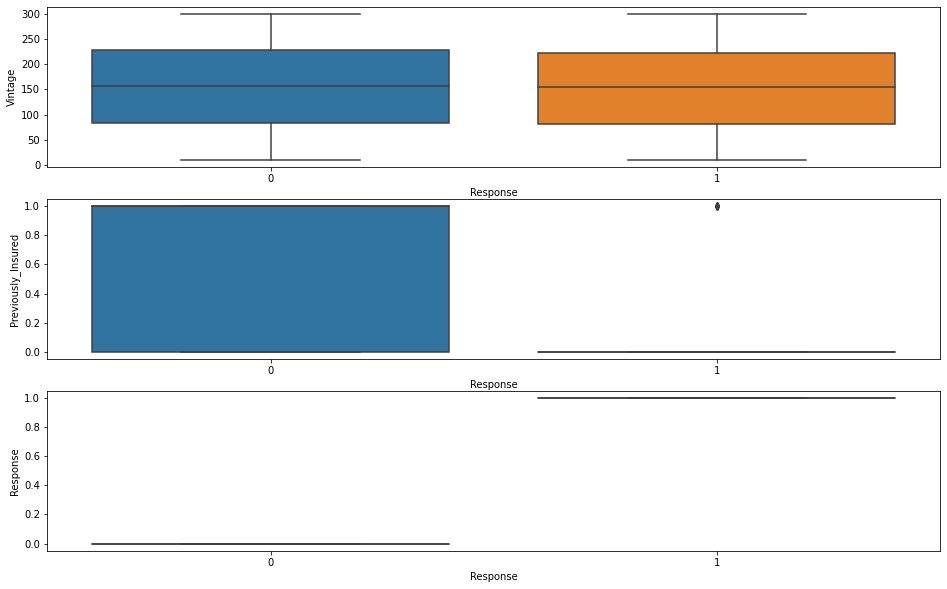

In [9]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 10
fig, axes = plt.subplots(3, 1)
for num_col, ax in zip(num_cols, axes):
    sns.boxplot(data=data, x="Response", y=num_col, ax=ax)

<AxesSubplot:xlabel='Response', ylabel='Count'>

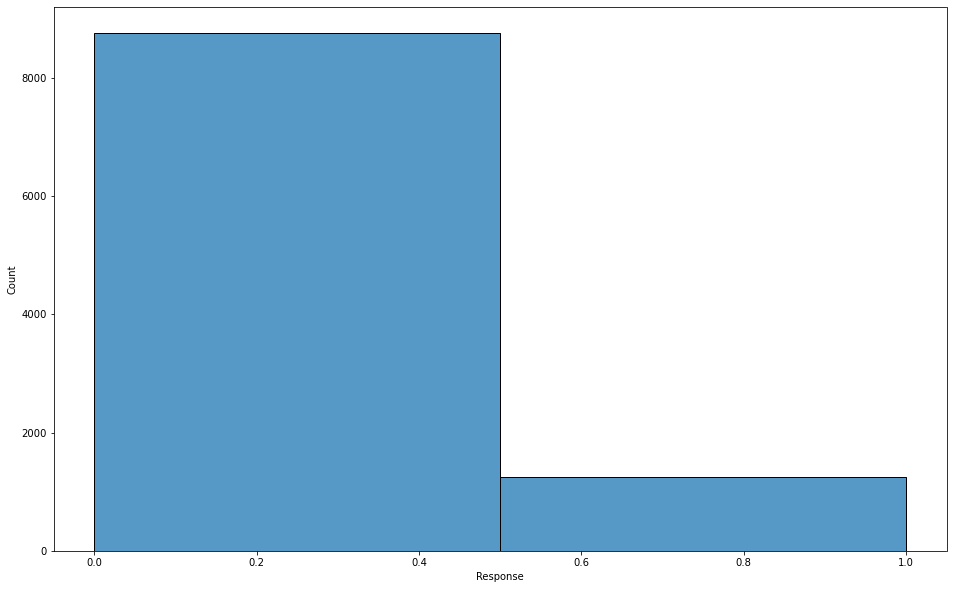

In [10]:
sns.histplot(data=data, x="Response", bins=2)

<AxesSubplot:>

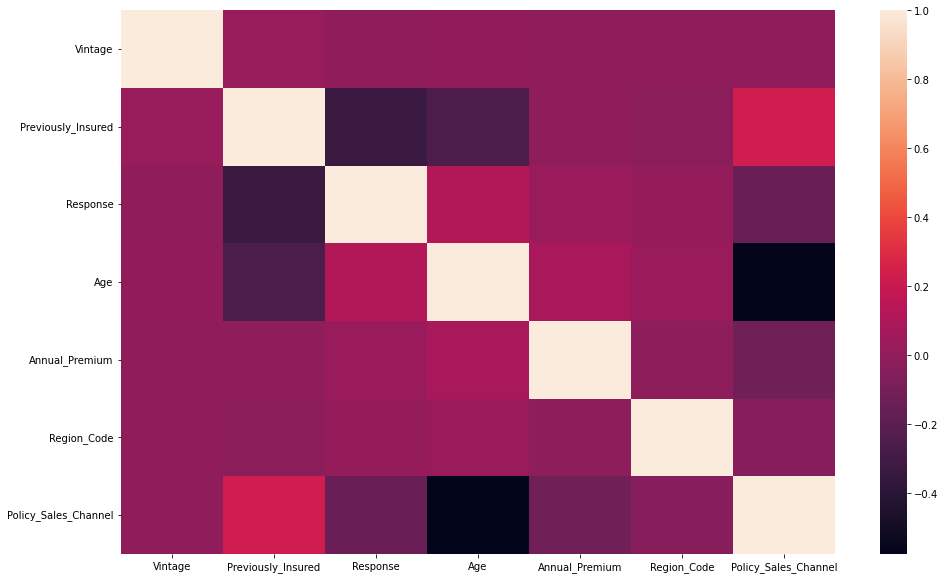

In [11]:
sns.heatmap(data[num_cols].corr())

In [12]:
cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns

In [13]:
data = pd.concat([data, pd.get_dummies(data[cat_cols], drop_first=True)], axis=1).drop(cat_cols, axis=1)
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,1,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,1,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,1,14.0,1,25426.0,152.0,247,0,0,1,0,0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(learning_rate = 1, random_state = 1, n_estimators = 100)
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)

In [16]:
f1 = f1_score(y_test, y_pred)
print(f"F1-SCORE = {f1}")

F1-SCORE = 0.27027027027027023


In [17]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, grad_boost.predict_proba(X_test)[:, 1])

ROC_AUC = 0.828168754605748


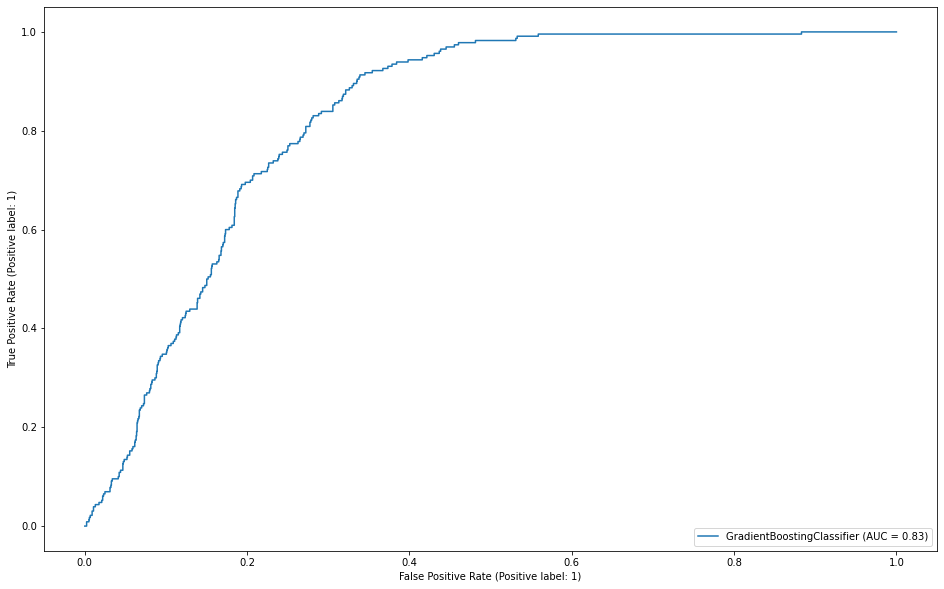

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(grad_boost, X_test, y_test)
print(f"ROC_AUC = {roc_auc}")
plt.show()

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [19]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [20]:
### Your code is here
scores = {}
for learning_rate in learning_rate_list:
    f1_scores = []
    for n_estimators in n_estimators_list:
        grad_boost = GradientBoostingClassifier(learning_rate = learning_rate, 
                                                random_state = 1, 
                                                n_estimators = n_estimators)
        grad_boost.fit(X_train, y_train)
        y_pred = grad_boost.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
    scores.update({learning_rate:f1_scores})

In [65]:
scores_pd = pd.DataFrame(data=scores)
scores_pd['estimators'] = [5, 10, 20, 50, 100, 200, 700, 1000]
scores_pd = scores_pd.set_index('estimators')

In [70]:
scores_pd

,1.0,0.1,0.01
estimators,,,
5,0.831627,0.830759,0.831008
10,0.838842,0.830759,0.831008
20,0.841775,0.830759,0.831008
50,0.841602,0.830759,0.831008
100,0.842926,0.831971,0.830759
200,0.840530,0.835457,0.830759
700,0.842988,0.845544,0.830510
1000,0.841267,0.844815,0.831464


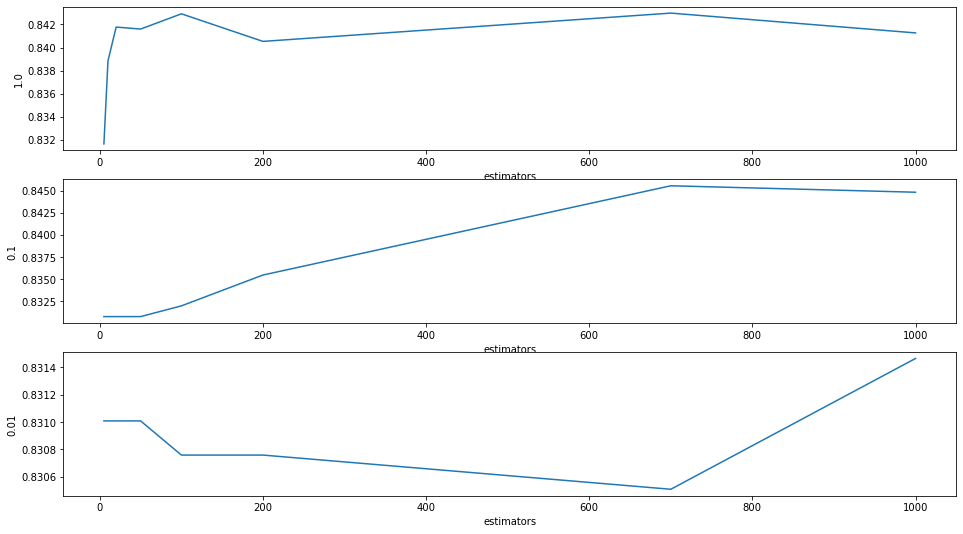

In [71]:
from matplotlib import rcParams
y = [1, 0.1, 0.01]
x = 'estimators'
# figure size in inches
rcParams['figure.figsize'] = 16, 9
fig, axes = plt.subplots(3, 1)
for idx_col, ax in zip(range(3), axes):
    data = scores_pd.iloc[:, idx_col]
    sns.lineplot(data=data, ax=ax)

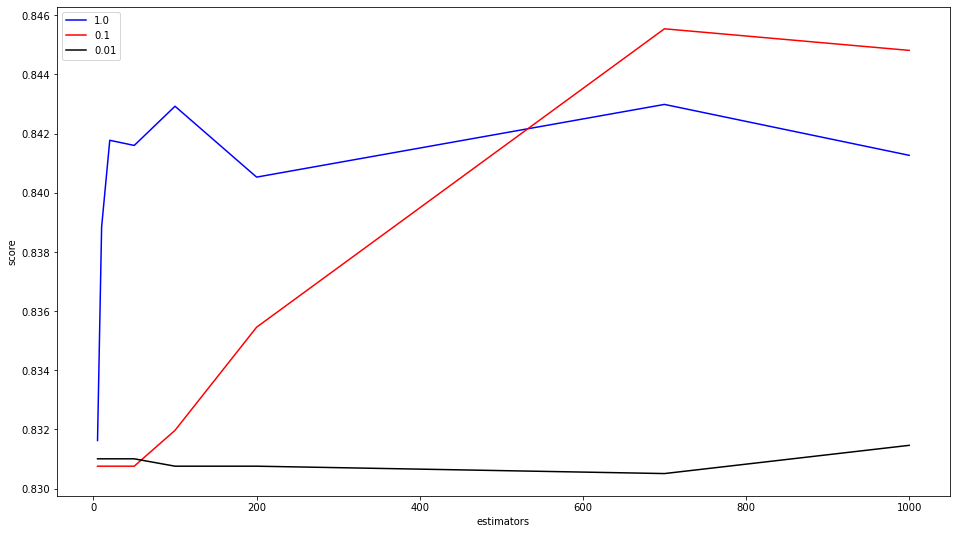

In [91]:
fig, ax = plt.subplots()
colors = ["blue", "red", "black"]
lrs = [1.0, 0.1, 0.01]
for i in range(scores_pd.shape[1]):
    ax.plot(scores_pd.iloc[:, i], color=colors[i], label=lrs[i])
ax.set_xlabel('estimators')
ax.set_ylabel('score')
ax.legend()
plt.show()

**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [99]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

models = [RandomForestClassifier(max_depth=5, random_state=1),
          RandomForestClassifier(max_depth=5000, random_state=1),
          GradientBoostingClassifier(learning_rate = 0.1, 
                                                random_state = 1, 
                                                max_depth = 5),
          GradientBoostingClassifier(learning_rate = 0.1, 
                                                random_state = 1, 
                                                max_depth = 500),
         ]
    

In [109]:
f1 = [0.8343693233656058, 0.8326586420276343, 0.8307588219686919, 0.8331741427417452, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817]
sc = {'as':f1}
sc.update({'afs':f1})

0: RFC_5 fited
Scores: [0.8343693233656058, 0.8326586420276343, 0.8307588219686919, 0.8331741427417452, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8310079575596817]

1: RFC_5000 fited
Scores: [0.8470935948810975, 0.8422991352295769, 0.8413314107027893, 0.8392703293919329, 0.8417679471072068, 0.8478357642815224, 0.8451016047229235, 0.8393408977139998, 0.8384355069690981, 0.8375358026264105, 0.8390797638582395, 0.8393891891891893, 0.8396993994774107]

2: GBC_5 fited
Scores: [0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8307588219686919, 0.8307588219686919, 0.8307588219686919, 0.8307588219686919, 0.8307588219686919, 0.8319706786734022, 0.8354567307692309, 0.8455443439122964, 0.8448147221784212, 0.8431081369292304]

3: GBC_500 fited
Scores: [0.8310079575596817, 0.8310079575596817, 0.8310079575596817, 0.8307588219686919, 0.8307588219686919, 0.83075882196869

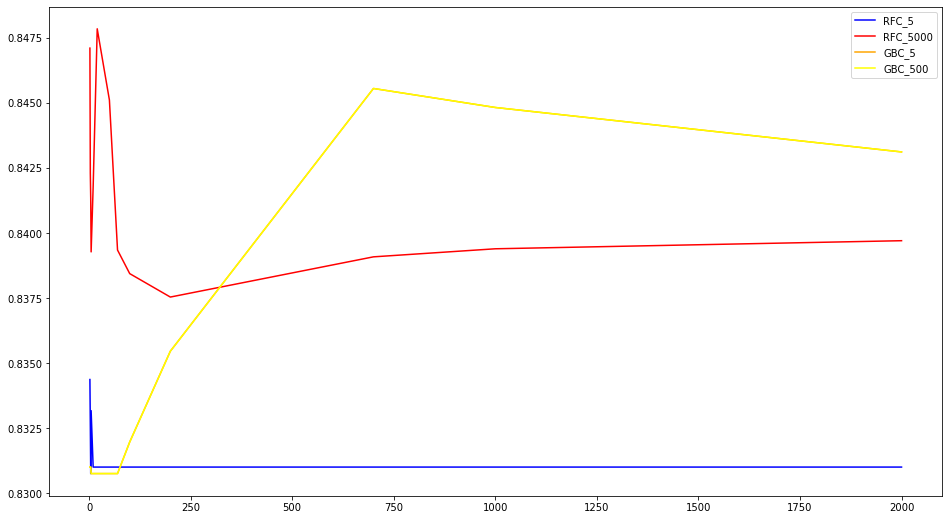

In [113]:
fig, ax = plt.subplots()
colors = ["blue", "red", "orange", "yellow"]
name_models = ['RFC_5', 'RFC_5000', 'GBC_5', 'GBC_500']

scores = {}
for i in range(len(models)):
    model = models[i]
    f1_scores = []
    
    for n_estimators in n_estimators_list:         
        model.set_params(**{'n_estimators': n_estimators})
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
        
    print(f"{i}: {name_models[i]} fited")
    print(f"Scores: {f1_scores}")
    print()
    
    scores.update({name_models[i]:f1_scores})
    
    ax.plot(n_estimators_list, f1_scores, color=colors[i], label=name_models[i])
    ax.legend()
plt.show()

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [114]:
!pip install catboost

In [122]:
from catboost import CatBoostClassifier

data = pd.read_csv('vehicle_insurance.csv')

cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns

col_to_cat = ['Driving_License']
cat_cols = np.append(cat_cols, col_to_cat)
num_cols = list(set(num_cols) - set(col_to_cat))

In [123]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [129]:
### Your code is here
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

scores = {}
for learning_rate in learning_rate_list:
    f1_scores = []
    for n_estimators in n_estimators_list:
        cat_boost_model = CatBoostClassifier(iterations=n_estimators,
                                             learning_rate=learning_rate,
                                             cat_features = cat_cols)
        cat_boost_model.fit(X_train, y_train)
        y_pred = cat_boost_model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
    scores.update({learning_rate:f1_scores})

0:	learn: 0.3512145	total: 189ms	remaining: 758ms
1:	learn: 0.3017133	total: 207ms	remaining: 311ms
2:	learn: 0.2870740	total: 227ms	remaining: 151ms
3:	learn: 0.2850718	total: 246ms	remaining: 61.5ms
4:	learn: 0.2791481	total: 265ms	remaining: 0us
0:	learn: 0.3512145	total: 49.7ms	remaining: 448ms
1:	learn: 0.3017133	total: 68.8ms	remaining: 275ms
2:	learn: 0.2870740	total: 89.8ms	remaining: 209ms
3:	learn: 0.2850718	total: 109ms	remaining: 163ms
4:	learn: 0.2791481	total: 127ms	remaining: 127ms
5:	learn: 0.2745826	total: 147ms	remaining: 97.7ms
6:	learn: 0.2739367	total: 157ms	remaining: 67.5ms
7:	learn: 0.2705570	total: 177ms	remaining: 44.2ms
8:	learn: 0.2692905	total: 197ms	remaining: 21.8ms
9:	learn: 0.2669782	total: 233ms	remaining: 0us
0:	learn: 0.3512145	total: 33.7ms	remaining: 641ms
1:	learn: 0.3017133	total: 54.8ms	remaining: 493ms
2:	learn: 0.2870740	total: 86.6ms	remaining: 491ms
3:	learn: 0.2850718	total: 110ms	remaining: 441ms
4:	learn: 0.2791481	total: 133ms	remaining:

86:	learn: 0.1770611	total: 1.81s	remaining: 271ms
87:	learn: 0.1770575	total: 1.83s	remaining: 250ms
88:	learn: 0.1767749	total: 1.85s	remaining: 229ms
89:	learn: 0.1759444	total: 1.87s	remaining: 208ms
90:	learn: 0.1755837	total: 1.89s	remaining: 187ms
91:	learn: 0.1751451	total: 1.91s	remaining: 166ms
92:	learn: 0.1737756	total: 1.94s	remaining: 146ms
93:	learn: 0.1729155	total: 1.96s	remaining: 125ms
94:	learn: 0.1724374	total: 1.98s	remaining: 104ms
95:	learn: 0.1712002	total: 2s	remaining: 83.4ms
96:	learn: 0.1705426	total: 2.02s	remaining: 62.5ms
97:	learn: 0.1695925	total: 2.04s	remaining: 41.7ms
98:	learn: 0.1688354	total: 2.06s	remaining: 20.8ms
99:	learn: 0.1680378	total: 2.08s	remaining: 0us
0:	learn: 0.2906005	total: 21.3ms	remaining: 4.23s
1:	learn: 0.2788715	total: 42ms	remaining: 4.16s
2:	learn: 0.2743816	total: 64.2ms	remaining: 4.21s
3:	learn: 0.2710479	total: 86.7ms	remaining: 4.25s
4:	learn: 0.2703610	total: 95.8ms	remaining: 3.74s
5:	learn: 0.2692042	total: 114ms	r

148:	learn: 0.0709609	total: 3.5s	remaining: 1.2s
149:	learn: 0.0707135	total: 3.52s	remaining: 1.18s
150:	learn: 0.0702423	total: 3.55s	remaining: 1.15s
151:	learn: 0.0700760	total: 3.57s	remaining: 1.13s
152:	learn: 0.0694535	total: 3.59s	remaining: 1.1s
153:	learn: 0.0688165	total: 3.61s	remaining: 1.08s
154:	learn: 0.0681674	total: 3.63s	remaining: 1.05s
155:	learn: 0.0678078	total: 3.66s	remaining: 1.03s
156:	learn: 0.0678033	total: 3.67s	remaining: 1.01s
157:	learn: 0.0672712	total: 3.69s	remaining: 982ms
158:	learn: 0.0668509	total: 3.72s	remaining: 959ms
159:	learn: 0.0666827	total: 3.74s	remaining: 935ms
160:	learn: 0.0659009	total: 3.76s	remaining: 911ms
161:	learn: 0.0653551	total: 3.78s	remaining: 888ms
162:	learn: 0.0646068	total: 3.81s	remaining: 864ms
163:	learn: 0.0643095	total: 3.83s	remaining: 841ms
164:	learn: 0.0641238	total: 3.85s	remaining: 817ms
165:	learn: 0.0637344	total: 3.87s	remaining: 794ms
166:	learn: 0.0633714	total: 3.9s	remaining: 770ms
167:	learn: 0.06

118:	learn: 0.0924407	total: 3.09s	remaining: 15.1s
119:	learn: 0.0919855	total: 3.11s	remaining: 15s
120:	learn: 0.0912859	total: 3.13s	remaining: 15s
121:	learn: 0.0902129	total: 3.15s	remaining: 14.9s
122:	learn: 0.0896330	total: 3.18s	remaining: 14.9s
123:	learn: 0.0885785	total: 3.2s	remaining: 14.9s
124:	learn: 0.0879724	total: 3.22s	remaining: 14.8s
125:	learn: 0.0867600	total: 3.24s	remaining: 14.8s
126:	learn: 0.0859762	total: 3.26s	remaining: 14.7s
127:	learn: 0.0845581	total: 3.29s	remaining: 14.7s
128:	learn: 0.0837949	total: 3.31s	remaining: 14.6s
129:	learn: 0.0828897	total: 3.33s	remaining: 14.6s
130:	learn: 0.0821172	total: 3.35s	remaining: 14.6s
131:	learn: 0.0819217	total: 3.37s	remaining: 14.5s
132:	learn: 0.0812702	total: 3.4s	remaining: 14.5s
133:	learn: 0.0804166	total: 3.42s	remaining: 14.4s
134:	learn: 0.0800266	total: 3.44s	remaining: 14.4s
135:	learn: 0.0793684	total: 3.46s	remaining: 14.4s
136:	learn: 0.0783272	total: 3.49s	remaining: 14.3s
137:	learn: 0.0779

277:	learn: 0.0288529	total: 7.25s	remaining: 11s
278:	learn: 0.0288050	total: 7.27s	remaining: 11s
279:	learn: 0.0286233	total: 7.3s	remaining: 10.9s
280:	learn: 0.0284931	total: 7.33s	remaining: 10.9s
281:	learn: 0.0283764	total: 7.36s	remaining: 10.9s
282:	learn: 0.0282131	total: 7.38s	remaining: 10.9s
283:	learn: 0.0281141	total: 7.4s	remaining: 10.8s
284:	learn: 0.0276893	total: 7.42s	remaining: 10.8s
285:	learn: 0.0276176	total: 7.44s	remaining: 10.8s
286:	learn: 0.0272628	total: 7.47s	remaining: 10.7s
287:	learn: 0.0268852	total: 7.49s	remaining: 10.7s
288:	learn: 0.0267280	total: 7.51s	remaining: 10.7s
289:	learn: 0.0265968	total: 7.53s	remaining: 10.7s
290:	learn: 0.0265784	total: 7.55s	remaining: 10.6s
291:	learn: 0.0264073	total: 7.58s	remaining: 10.6s
292:	learn: 0.0262681	total: 7.63s	remaining: 10.6s
293:	learn: 0.0261671	total: 7.66s	remaining: 10.6s
294:	learn: 0.0260731	total: 7.69s	remaining: 10.6s
295:	learn: 0.0259142	total: 7.72s	remaining: 10.5s
296:	learn: 0.0257

437:	learn: 0.0124023	total: 11.2s	remaining: 6.68s
438:	learn: 0.0123500	total: 11.2s	remaining: 6.65s
439:	learn: 0.0122638	total: 11.2s	remaining: 6.63s
440:	learn: 0.0122259	total: 11.2s	remaining: 6.6s
441:	learn: 0.0121750	total: 11.3s	remaining: 6.58s
442:	learn: 0.0121088	total: 11.3s	remaining: 6.56s
443:	learn: 0.0120779	total: 11.3s	remaining: 6.54s
444:	learn: 0.0120162	total: 11.4s	remaining: 6.52s
445:	learn: 0.0119830	total: 11.4s	remaining: 6.49s
446:	learn: 0.0119371	total: 11.4s	remaining: 6.46s
447:	learn: 0.0118415	total: 11.4s	remaining: 6.44s
448:	learn: 0.0118038	total: 11.5s	remaining: 6.41s
449:	learn: 0.0117969	total: 11.5s	remaining: 6.38s
450:	learn: 0.0117667	total: 11.5s	remaining: 6.35s
451:	learn: 0.0117523	total: 11.5s	remaining: 6.33s
452:	learn: 0.0116621	total: 11.6s	remaining: 6.3s
453:	learn: 0.0116425	total: 11.6s	remaining: 6.27s
454:	learn: 0.0116425	total: 11.6s	remaining: 6.24s
455:	learn: 0.0116171	total: 11.6s	remaining: 6.22s
456:	learn: 0.

601:	learn: 0.0073053	total: 15.3s	remaining: 2.48s
602:	learn: 0.0072870	total: 15.3s	remaining: 2.46s
603:	learn: 0.0072464	total: 15.3s	remaining: 2.43s
604:	learn: 0.0072312	total: 15.3s	remaining: 2.41s
605:	learn: 0.0072079	total: 15.4s	remaining: 2.38s
606:	learn: 0.0071883	total: 15.4s	remaining: 2.36s
607:	learn: 0.0071645	total: 15.4s	remaining: 2.33s
608:	learn: 0.0071489	total: 15.4s	remaining: 2.31s
609:	learn: 0.0071398	total: 15.4s	remaining: 2.28s
610:	learn: 0.0071362	total: 15.5s	remaining: 2.25s
611:	learn: 0.0071361	total: 15.5s	remaining: 2.23s
612:	learn: 0.0071257	total: 15.5s	remaining: 2.2s
613:	learn: 0.0071256	total: 15.5s	remaining: 2.17s
614:	learn: 0.0071074	total: 15.6s	remaining: 2.15s
615:	learn: 0.0070894	total: 15.6s	remaining: 2.12s
616:	learn: 0.0070755	total: 15.6s	remaining: 2.1s
617:	learn: 0.0070755	total: 15.6s	remaining: 2.07s
618:	learn: 0.0070640	total: 15.6s	remaining: 2.04s
619:	learn: 0.0070509	total: 15.7s	remaining: 2.02s
620:	learn: 0.

64:	learn: 0.1509722	total: 1.67s	remaining: 24s
65:	learn: 0.1496587	total: 1.69s	remaining: 23.9s
66:	learn: 0.1482493	total: 1.71s	remaining: 23.8s
67:	learn: 0.1456917	total: 1.73s	remaining: 23.8s
68:	learn: 0.1441346	total: 1.75s	remaining: 23.7s
69:	learn: 0.1426282	total: 1.78s	remaining: 23.6s
70:	learn: 0.1417152	total: 1.8s	remaining: 23.5s
71:	learn: 0.1405502	total: 1.82s	remaining: 23.5s
72:	learn: 0.1400671	total: 1.87s	remaining: 23.7s
73:	learn: 0.1392152	total: 1.89s	remaining: 23.7s
74:	learn: 0.1384652	total: 1.91s	remaining: 23.6s
75:	learn: 0.1374355	total: 1.94s	remaining: 23.5s
76:	learn: 0.1348449	total: 1.96s	remaining: 23.5s
77:	learn: 0.1333042	total: 1.98s	remaining: 23.4s
78:	learn: 0.1315517	total: 2s	remaining: 23.4s
79:	learn: 0.1306989	total: 2.03s	remaining: 23.3s
80:	learn: 0.1298415	total: 2.05s	remaining: 23.3s
81:	learn: 0.1282326	total: 2.07s	remaining: 23.2s
82:	learn: 0.1265292	total: 2.1s	remaining: 23.2s
83:	learn: 0.1250394	total: 2.12s	rema

225:	learn: 0.0396524	total: 5.54s	remaining: 19s
226:	learn: 0.0393973	total: 5.57s	remaining: 19s
227:	learn: 0.0392493	total: 5.59s	remaining: 18.9s
228:	learn: 0.0390688	total: 5.61s	remaining: 18.9s
229:	learn: 0.0387017	total: 5.63s	remaining: 18.9s
230:	learn: 0.0385087	total: 5.66s	remaining: 18.9s
231:	learn: 0.0383294	total: 5.7s	remaining: 18.9s
232:	learn: 0.0381724	total: 5.73s	remaining: 18.9s
233:	learn: 0.0379686	total: 5.75s	remaining: 18.8s
234:	learn: 0.0379228	total: 5.78s	remaining: 18.8s
235:	learn: 0.0372631	total: 5.8s	remaining: 18.8s
236:	learn: 0.0368721	total: 5.82s	remaining: 18.7s
237:	learn: 0.0366133	total: 5.84s	remaining: 18.7s
238:	learn: 0.0366132	total: 5.88s	remaining: 18.7s
239:	learn: 0.0365297	total: 5.91s	remaining: 18.7s
240:	learn: 0.0364631	total: 5.93s	remaining: 18.7s
241:	learn: 0.0360381	total: 5.95s	remaining: 18.6s
242:	learn: 0.0358608	total: 5.97s	remaining: 18.6s
243:	learn: 0.0356014	total: 5.99s	remaining: 18.6s
244:	learn: 0.0354

390:	learn: 0.0158516	total: 10.1s	remaining: 15.7s
391:	learn: 0.0157721	total: 10.1s	remaining: 15.7s
392:	learn: 0.0157105	total: 10.1s	remaining: 15.6s
393:	learn: 0.0156213	total: 10.1s	remaining: 15.6s
394:	learn: 0.0155512	total: 10.2s	remaining: 15.6s
395:	learn: 0.0154116	total: 10.2s	remaining: 15.6s
396:	learn: 0.0153760	total: 10.2s	remaining: 15.5s
397:	learn: 0.0153241	total: 10.3s	remaining: 15.5s
398:	learn: 0.0152209	total: 10.3s	remaining: 15.5s
399:	learn: 0.0151944	total: 10.3s	remaining: 15.5s
400:	learn: 0.0150243	total: 10.4s	remaining: 15.5s
401:	learn: 0.0149529	total: 10.4s	remaining: 15.5s
402:	learn: 0.0149041	total: 10.4s	remaining: 15.5s
403:	learn: 0.0148150	total: 10.5s	remaining: 15.4s
404:	learn: 0.0146978	total: 10.5s	remaining: 15.4s
405:	learn: 0.0146072	total: 10.5s	remaining: 15.4s
406:	learn: 0.0145487	total: 10.6s	remaining: 15.4s
407:	learn: 0.0145341	total: 10.6s	remaining: 15.4s
408:	learn: 0.0144815	total: 10.6s	remaining: 15.4s
409:	learn: 

550:	learn: 0.0084738	total: 14.5s	remaining: 11.8s
551:	learn: 0.0084312	total: 14.5s	remaining: 11.8s
552:	learn: 0.0083985	total: 14.5s	remaining: 11.7s
553:	learn: 0.0083756	total: 14.5s	remaining: 11.7s
554:	learn: 0.0083399	total: 14.6s	remaining: 11.7s
555:	learn: 0.0083399	total: 14.6s	remaining: 11.6s
556:	learn: 0.0083399	total: 14.6s	remaining: 11.6s
557:	learn: 0.0083301	total: 14.6s	remaining: 11.6s
558:	learn: 0.0082860	total: 14.7s	remaining: 11.6s
559:	learn: 0.0082530	total: 14.7s	remaining: 11.5s
560:	learn: 0.0082334	total: 14.7s	remaining: 11.5s
561:	learn: 0.0082333	total: 14.8s	remaining: 11.5s
562:	learn: 0.0081803	total: 14.8s	remaining: 11.5s
563:	learn: 0.0081516	total: 14.8s	remaining: 11.5s
564:	learn: 0.0081341	total: 14.8s	remaining: 11.4s
565:	learn: 0.0081225	total: 14.9s	remaining: 11.4s
566:	learn: 0.0081027	total: 14.9s	remaining: 11.4s
567:	learn: 0.0080768	total: 14.9s	remaining: 11.3s
568:	learn: 0.0080701	total: 14.9s	remaining: 11.3s
569:	learn: 

712:	learn: 0.0057909	total: 19.1s	remaining: 7.69s
713:	learn: 0.0057763	total: 19.1s	remaining: 7.66s
714:	learn: 0.0057579	total: 19.2s	remaining: 7.64s
715:	learn: 0.0057465	total: 19.2s	remaining: 7.61s
716:	learn: 0.0057200	total: 19.2s	remaining: 7.58s
717:	learn: 0.0057137	total: 19.2s	remaining: 7.55s
718:	learn: 0.0057002	total: 19.3s	remaining: 7.53s
719:	learn: 0.0056814	total: 19.3s	remaining: 7.5s
720:	learn: 0.0056721	total: 19.3s	remaining: 7.47s
721:	learn: 0.0056464	total: 19.3s	remaining: 7.44s
722:	learn: 0.0056464	total: 19.3s	remaining: 7.41s
723:	learn: 0.0056302	total: 19.4s	remaining: 7.38s
724:	learn: 0.0056238	total: 19.4s	remaining: 7.36s
725:	learn: 0.0056102	total: 19.4s	remaining: 7.33s
726:	learn: 0.0056102	total: 19.4s	remaining: 7.3s
727:	learn: 0.0055934	total: 19.5s	remaining: 7.27s
728:	learn: 0.0055631	total: 19.5s	remaining: 7.25s
729:	learn: 0.0055497	total: 19.5s	remaining: 7.22s
730:	learn: 0.0055283	total: 19.5s	remaining: 7.19s
731:	learn: 0.

878:	learn: 0.0045647	total: 23.2s	remaining: 3.2s
879:	learn: 0.0045566	total: 23.3s	remaining: 3.17s
880:	learn: 0.0045565	total: 23.3s	remaining: 3.14s
881:	learn: 0.0045565	total: 23.3s	remaining: 3.12s
882:	learn: 0.0045565	total: 23.3s	remaining: 3.09s
883:	learn: 0.0045565	total: 23.4s	remaining: 3.06s
884:	learn: 0.0045564	total: 23.4s	remaining: 3.04s
885:	learn: 0.0045352	total: 23.4s	remaining: 3.01s
886:	learn: 0.0045199	total: 23.4s	remaining: 2.99s
887:	learn: 0.0045199	total: 23.5s	remaining: 2.96s
888:	learn: 0.0045082	total: 23.5s	remaining: 2.93s
889:	learn: 0.0045081	total: 23.5s	remaining: 2.91s
890:	learn: 0.0045081	total: 23.6s	remaining: 2.88s
891:	learn: 0.0045080	total: 23.6s	remaining: 2.85s
892:	learn: 0.0045079	total: 23.6s	remaining: 2.83s
893:	learn: 0.0045079	total: 23.6s	remaining: 2.8s
894:	learn: 0.0045050	total: 23.7s	remaining: 2.78s
895:	learn: 0.0045048	total: 23.7s	remaining: 2.75s
896:	learn: 0.0045048	total: 23.7s	remaining: 2.72s
897:	learn: 0.

11:	learn: 0.3724417	total: 238ms	remaining: 755ms
12:	learn: 0.3629646	total: 260ms	remaining: 739ms
13:	learn: 0.3547302	total: 281ms	remaining: 723ms
14:	learn: 0.3470516	total: 301ms	remaining: 703ms
15:	learn: 0.3399253	total: 321ms	remaining: 683ms
16:	learn: 0.3341810	total: 342ms	remaining: 664ms
17:	learn: 0.3286452	total: 362ms	remaining: 644ms
18:	learn: 0.3238960	total: 373ms	remaining: 608ms
19:	learn: 0.3193459	total: 393ms	remaining: 590ms
20:	learn: 0.3156422	total: 413ms	remaining: 571ms
21:	learn: 0.3122952	total: 433ms	remaining: 552ms
22:	learn: 0.3089013	total: 454ms	remaining: 533ms
23:	learn: 0.3057814	total: 475ms	remaining: 515ms
24:	learn: 0.3027509	total: 495ms	remaining: 495ms
25:	learn: 0.3003507	total: 516ms	remaining: 476ms
26:	learn: 0.2981718	total: 537ms	remaining: 457ms
27:	learn: 0.2960385	total: 557ms	remaining: 438ms
28:	learn: 0.2941035	total: 579ms	remaining: 419ms
29:	learn: 0.2925888	total: 600ms	remaining: 400ms
30:	learn: 0.2910023	total: 622

28:	learn: 0.2702156	total: 756ms	remaining: 4.46s
29:	learn: 0.2699753	total: 782ms	remaining: 4.43s
30:	learn: 0.2698859	total: 806ms	remaining: 4.39s
31:	learn: 0.2690977	total: 830ms	remaining: 4.36s
32:	learn: 0.2687832	total: 855ms	remaining: 4.32s
33:	learn: 0.2682583	total: 880ms	remaining: 4.3s
34:	learn: 0.2679113	total: 905ms	remaining: 4.26s
35:	learn: 0.2674948	total: 928ms	remaining: 4.23s
36:	learn: 0.2670516	total: 969ms	remaining: 4.27s
37:	learn: 0.2664213	total: 1s	remaining: 4.26s
38:	learn: 0.2660870	total: 1.02s	remaining: 4.22s
39:	learn: 0.2659548	total: 1.05s	remaining: 4.18s
40:	learn: 0.2659275	total: 1.06s	remaining: 4.12s
41:	learn: 0.2656077	total: 1.08s	remaining: 4.08s
42:	learn: 0.2648776	total: 1.11s	remaining: 4.05s
43:	learn: 0.2646082	total: 1.13s	remaining: 4.02s
44:	learn: 0.2644611	total: 1.16s	remaining: 3.99s
45:	learn: 0.2639347	total: 1.18s	remaining: 3.96s
46:	learn: 0.2636631	total: 1.2s	remaining: 3.91s
47:	learn: 0.2633865	total: 1.23s	re

191:	learn: 0.2186687	total: 5.49s	remaining: 229ms
192:	learn: 0.2182301	total: 5.53s	remaining: 200ms
193:	learn: 0.2178901	total: 5.56s	remaining: 172ms
194:	learn: 0.2176285	total: 5.58s	remaining: 143ms
195:	learn: 0.2171772	total: 5.6s	remaining: 114ms
196:	learn: 0.2169152	total: 5.63s	remaining: 85.7ms
197:	learn: 0.2165090	total: 5.65s	remaining: 57.1ms
198:	learn: 0.2161529	total: 5.67s	remaining: 28.5ms
199:	learn: 0.2158774	total: 5.7s	remaining: 0us
0:	learn: 0.5495043	total: 34.4ms	remaining: 24.1s
1:	learn: 0.4696225	total: 55.2ms	remaining: 19.3s
2:	learn: 0.4334440	total: 79.7ms	remaining: 18.5s
3:	learn: 0.3855850	total: 105ms	remaining: 18.2s
4:	learn: 0.3547149	total: 129ms	remaining: 17.9s
5:	learn: 0.3336686	total: 155ms	remaining: 18s
6:	learn: 0.3203383	total: 174ms	remaining: 17.2s
7:	learn: 0.3100176	total: 205ms	remaining: 17.7s
8:	learn: 0.3027458	total: 232ms	remaining: 17.8s
9:	learn: 0.2962566	total: 260ms	remaining: 17.9s
10:	learn: 0.2921296	total: 284m

160:	learn: 0.2282098	total: 4.64s	remaining: 15.5s
161:	learn: 0.2279379	total: 4.67s	remaining: 15.5s
162:	learn: 0.2277476	total: 4.7s	remaining: 15.5s
163:	learn: 0.2275586	total: 4.73s	remaining: 15.5s
164:	learn: 0.2272671	total: 4.75s	remaining: 15.4s
165:	learn: 0.2270945	total: 4.79s	remaining: 15.4s
166:	learn: 0.2266279	total: 4.83s	remaining: 15.4s
167:	learn: 0.2261896	total: 4.86s	remaining: 15.4s
168:	learn: 0.2257637	total: 4.89s	remaining: 15.4s
169:	learn: 0.2256309	total: 4.92s	remaining: 15.3s
170:	learn: 0.2252802	total: 4.95s	remaining: 15.3s
171:	learn: 0.2249886	total: 4.98s	remaining: 15.3s
172:	learn: 0.2245714	total: 5s	remaining: 15.2s
173:	learn: 0.2241269	total: 5.03s	remaining: 15.2s
174:	learn: 0.2238845	total: 5.05s	remaining: 15.2s
175:	learn: 0.2235159	total: 5.08s	remaining: 15.1s
176:	learn: 0.2230066	total: 5.12s	remaining: 15.1s
177:	learn: 0.2227260	total: 5.14s	remaining: 15.1s
178:	learn: 0.2224381	total: 5.17s	remaining: 15s
179:	learn: 0.2223

320:	learn: 0.1872892	total: 9.34s	remaining: 11s
321:	learn: 0.1870281	total: 9.38s	remaining: 11s
322:	learn: 0.1868167	total: 9.45s	remaining: 11s
323:	learn: 0.1865219	total: 9.52s	remaining: 11.1s
324:	learn: 0.1862438	total: 9.55s	remaining: 11s
325:	learn: 0.1860866	total: 9.58s	remaining: 11s
326:	learn: 0.1859426	total: 9.63s	remaining: 11s
327:	learn: 0.1856685	total: 9.66s	remaining: 11s
328:	learn: 0.1853630	total: 9.69s	remaining: 10.9s
329:	learn: 0.1852867	total: 9.72s	remaining: 10.9s
330:	learn: 0.1852243	total: 9.75s	remaining: 10.9s
331:	learn: 0.1850994	total: 9.78s	remaining: 10.8s
332:	learn: 0.1848413	total: 9.81s	remaining: 10.8s
333:	learn: 0.1845806	total: 9.84s	remaining: 10.8s
334:	learn: 0.1844525	total: 9.87s	remaining: 10.8s
335:	learn: 0.1841210	total: 9.9s	remaining: 10.7s
336:	learn: 0.1838756	total: 9.93s	remaining: 10.7s
337:	learn: 0.1837729	total: 9.96s	remaining: 10.7s
338:	learn: 0.1835290	total: 9.99s	remaining: 10.6s
339:	learn: 0.1833549	total

484:	learn: 0.1583322	total: 13.9s	remaining: 6.16s
485:	learn: 0.1581557	total: 13.9s	remaining: 6.13s
486:	learn: 0.1579353	total: 13.9s	remaining: 6.1s
487:	learn: 0.1577854	total: 14s	remaining: 6.07s
488:	learn: 0.1575720	total: 14s	remaining: 6.04s
489:	learn: 0.1574572	total: 14s	remaining: 6.01s
490:	learn: 0.1571767	total: 14.1s	remaining: 5.98s
491:	learn: 0.1569759	total: 14.1s	remaining: 5.95s
492:	learn: 0.1568467	total: 14.1s	remaining: 5.92s
493:	learn: 0.1566981	total: 14.1s	remaining: 5.89s
494:	learn: 0.1564486	total: 14.2s	remaining: 5.86s
495:	learn: 0.1561010	total: 14.2s	remaining: 5.83s
496:	learn: 0.1558574	total: 14.2s	remaining: 5.8s
497:	learn: 0.1557876	total: 14.2s	remaining: 5.77s
498:	learn: 0.1554980	total: 14.2s	remaining: 5.74s
499:	learn: 0.1551357	total: 14.3s	remaining: 5.71s
500:	learn: 0.1550370	total: 14.3s	remaining: 5.68s
501:	learn: 0.1548771	total: 14.3s	remaining: 5.64s
502:	learn: 0.1546567	total: 14.3s	remaining: 5.62s
503:	learn: 0.154473

646:	learn: 0.1356267	total: 18.1s	remaining: 1.48s
647:	learn: 0.1354754	total: 18.1s	remaining: 1.45s
648:	learn: 0.1352693	total: 18.1s	remaining: 1.42s
649:	learn: 0.1351164	total: 18.1s	remaining: 1.4s
650:	learn: 0.1350123	total: 18.2s	remaining: 1.37s
651:	learn: 0.1349222	total: 18.2s	remaining: 1.34s
652:	learn: 0.1347324	total: 18.2s	remaining: 1.31s
653:	learn: 0.1345817	total: 18.2s	remaining: 1.28s
654:	learn: 0.1344436	total: 18.2s	remaining: 1.25s
655:	learn: 0.1343487	total: 18.3s	remaining: 1.23s
656:	learn: 0.1343260	total: 18.3s	remaining: 1.2s
657:	learn: 0.1341836	total: 18.3s	remaining: 1.17s
658:	learn: 0.1340374	total: 18.3s	remaining: 1.14s
659:	learn: 0.1339358	total: 18.4s	remaining: 1.11s
660:	learn: 0.1338032	total: 18.4s	remaining: 1.08s
661:	learn: 0.1337342	total: 18.4s	remaining: 1.06s
662:	learn: 0.1336772	total: 18.4s	remaining: 1.03s
663:	learn: 0.1335693	total: 18.5s	remaining: 1s
664:	learn: 0.1335432	total: 18.5s	remaining: 973ms
665:	learn: 0.133

112:	learn: 0.2434237	total: 2.79s	remaining: 21.9s
113:	learn: 0.2432734	total: 2.81s	remaining: 21.9s
114:	learn: 0.2430761	total: 2.84s	remaining: 21.8s
115:	learn: 0.2428020	total: 2.86s	remaining: 21.8s
116:	learn: 0.2424145	total: 2.89s	remaining: 21.8s
117:	learn: 0.2419983	total: 2.92s	remaining: 21.8s
118:	learn: 0.2415381	total: 2.94s	remaining: 21.8s
119:	learn: 0.2411816	total: 2.97s	remaining: 21.8s
120:	learn: 0.2410001	total: 3s	remaining: 21.8s
121:	learn: 0.2405472	total: 3.03s	remaining: 21.8s
122:	learn: 0.2402853	total: 3.06s	remaining: 21.8s
123:	learn: 0.2399177	total: 3.08s	remaining: 21.8s
124:	learn: 0.2397693	total: 3.1s	remaining: 21.7s
125:	learn: 0.2393753	total: 3.12s	remaining: 21.7s
126:	learn: 0.2387462	total: 3.14s	remaining: 21.6s
127:	learn: 0.2383216	total: 3.17s	remaining: 21.6s
128:	learn: 0.2381135	total: 3.19s	remaining: 21.5s
129:	learn: 0.2378084	total: 3.21s	remaining: 21.5s
130:	learn: 0.2374320	total: 3.24s	remaining: 21.5s
131:	learn: 0.23

271:	learn: 0.1974830	total: 6.67s	remaining: 17.9s
272:	learn: 0.1972708	total: 6.69s	remaining: 17.8s
273:	learn: 0.1969905	total: 6.71s	remaining: 17.8s
274:	learn: 0.1967657	total: 6.74s	remaining: 17.8s
275:	learn: 0.1965591	total: 6.76s	remaining: 17.7s
276:	learn: 0.1963660	total: 6.79s	remaining: 17.7s
277:	learn: 0.1962084	total: 6.82s	remaining: 17.7s
278:	learn: 0.1959143	total: 6.84s	remaining: 17.7s
279:	learn: 0.1956134	total: 6.86s	remaining: 17.6s
280:	learn: 0.1953171	total: 6.89s	remaining: 17.6s
281:	learn: 0.1951171	total: 6.91s	remaining: 17.6s
282:	learn: 0.1949502	total: 6.93s	remaining: 17.6s
283:	learn: 0.1947832	total: 6.96s	remaining: 17.5s
284:	learn: 0.1946152	total: 6.98s	remaining: 17.5s
285:	learn: 0.1943325	total: 7s	remaining: 17.5s
286:	learn: 0.1939337	total: 7.02s	remaining: 17.4s
287:	learn: 0.1937323	total: 7.04s	remaining: 17.4s
288:	learn: 0.1934537	total: 7.07s	remaining: 17.4s
289:	learn: 0.1933977	total: 7.09s	remaining: 17.4s
290:	learn: 0.1

434:	learn: 0.1669572	total: 10.7s	remaining: 13.9s
435:	learn: 0.1667788	total: 10.8s	remaining: 13.9s
436:	learn: 0.1665834	total: 10.8s	remaining: 13.9s
437:	learn: 0.1665100	total: 10.8s	remaining: 13.9s
438:	learn: 0.1662883	total: 10.8s	remaining: 13.8s
439:	learn: 0.1660224	total: 10.9s	remaining: 13.9s
440:	learn: 0.1658649	total: 10.9s	remaining: 13.8s
441:	learn: 0.1657940	total: 10.9s	remaining: 13.8s
442:	learn: 0.1655674	total: 11s	remaining: 13.8s
443:	learn: 0.1653316	total: 11s	remaining: 13.7s
444:	learn: 0.1650822	total: 11s	remaining: 13.7s
445:	learn: 0.1649638	total: 11s	remaining: 13.7s
446:	learn: 0.1648191	total: 11s	remaining: 13.7s
447:	learn: 0.1646578	total: 11.1s	remaining: 13.6s
448:	learn: 0.1644351	total: 11.1s	remaining: 13.6s
449:	learn: 0.1643265	total: 11.1s	remaining: 13.6s
450:	learn: 0.1641918	total: 11.1s	remaining: 13.6s
451:	learn: 0.1641527	total: 11.2s	remaining: 13.5s
452:	learn: 0.1639459	total: 11.2s	remaining: 13.5s
453:	learn: 0.1637501	

599:	learn: 0.1405298	total: 14.6s	remaining: 9.72s
600:	learn: 0.1404595	total: 14.6s	remaining: 9.7s
601:	learn: 0.1403629	total: 14.6s	remaining: 9.67s
602:	learn: 0.1402664	total: 14.6s	remaining: 9.64s
603:	learn: 0.1401504	total: 14.7s	remaining: 9.62s
604:	learn: 0.1400491	total: 14.7s	remaining: 9.59s
605:	learn: 0.1399164	total: 14.7s	remaining: 9.57s
606:	learn: 0.1397648	total: 14.7s	remaining: 9.54s
607:	learn: 0.1396014	total: 14.8s	remaining: 9.52s
608:	learn: 0.1393702	total: 14.8s	remaining: 9.49s
609:	learn: 0.1392648	total: 14.8s	remaining: 9.46s
610:	learn: 0.1392321	total: 14.8s	remaining: 9.44s
611:	learn: 0.1390990	total: 14.8s	remaining: 9.41s
612:	learn: 0.1390042	total: 14.9s	remaining: 9.39s
613:	learn: 0.1389417	total: 14.9s	remaining: 9.36s
614:	learn: 0.1389327	total: 14.9s	remaining: 9.34s
615:	learn: 0.1389037	total: 14.9s	remaining: 9.31s
616:	learn: 0.1388079	total: 15s	remaining: 9.28s
617:	learn: 0.1387024	total: 15s	remaining: 9.26s
618:	learn: 0.138

764:	learn: 0.1227831	total: 18.4s	remaining: 5.65s
765:	learn: 0.1226337	total: 18.4s	remaining: 5.63s
766:	learn: 0.1225488	total: 18.4s	remaining: 5.6s
767:	learn: 0.1225024	total: 18.5s	remaining: 5.58s
768:	learn: 0.1223224	total: 18.5s	remaining: 5.56s
769:	learn: 0.1222280	total: 18.5s	remaining: 5.54s
770:	learn: 0.1221320	total: 18.6s	remaining: 5.51s
771:	learn: 0.1220139	total: 18.6s	remaining: 5.49s
772:	learn: 0.1219318	total: 18.6s	remaining: 5.46s
773:	learn: 0.1218821	total: 18.6s	remaining: 5.44s
774:	learn: 0.1217699	total: 18.6s	remaining: 5.41s
775:	learn: 0.1216919	total: 18.7s	remaining: 5.39s
776:	learn: 0.1215722	total: 18.7s	remaining: 5.36s
777:	learn: 0.1214816	total: 18.7s	remaining: 5.34s
778:	learn: 0.1214119	total: 18.7s	remaining: 5.32s
779:	learn: 0.1213413	total: 18.8s	remaining: 5.29s
780:	learn: 0.1211797	total: 18.8s	remaining: 5.27s
781:	learn: 0.1211566	total: 18.8s	remaining: 5.24s
782:	learn: 0.1210026	total: 18.8s	remaining: 5.22s
783:	learn: 0

923:	learn: 0.1077021	total: 22.3s	remaining: 1.83s
924:	learn: 0.1076192	total: 22.3s	remaining: 1.81s
925:	learn: 0.1075347	total: 22.3s	remaining: 1.78s
926:	learn: 0.1074716	total: 22.3s	remaining: 1.76s
927:	learn: 0.1073694	total: 22.3s	remaining: 1.73s
928:	learn: 0.1073075	total: 22.4s	remaining: 1.71s
929:	learn: 0.1072268	total: 22.4s	remaining: 1.69s
930:	learn: 0.1070911	total: 22.4s	remaining: 1.66s
931:	learn: 0.1070242	total: 22.5s	remaining: 1.64s
932:	learn: 0.1069629	total: 22.5s	remaining: 1.61s
933:	learn: 0.1068189	total: 22.5s	remaining: 1.59s
934:	learn: 0.1067733	total: 22.5s	remaining: 1.57s
935:	learn: 0.1067164	total: 22.6s	remaining: 1.54s
936:	learn: 0.1066286	total: 22.6s	remaining: 1.52s
937:	learn: 0.1065062	total: 22.6s	remaining: 1.49s
938:	learn: 0.1064180	total: 22.6s	remaining: 1.47s
939:	learn: 0.1063727	total: 22.7s	remaining: 1.45s
940:	learn: 0.1062367	total: 22.7s	remaining: 1.42s
941:	learn: 0.1061385	total: 22.7s	remaining: 1.4s
942:	learn: 0

2:	learn: 0.6755323	total: 66ms	remaining: 2.13s
3:	learn: 0.6700522	total: 90.2ms	remaining: 2.17s
4:	learn: 0.6645389	total: 114ms	remaining: 2.17s
5:	learn: 0.6592460	total: 144ms	remaining: 2.25s
6:	learn: 0.6538019	total: 158ms	remaining: 2.1s
7:	learn: 0.6486691	total: 181ms	remaining: 2.08s
8:	learn: 0.6434481	total: 190ms	remaining: 1.92s
9:	learn: 0.6384694	total: 211ms	remaining: 1.9s
10:	learn: 0.6334431	total: 222ms	remaining: 1.79s
11:	learn: 0.6286162	total: 242ms	remaining: 1.77s
12:	learn: 0.6239325	total: 262ms	remaining: 1.75s
13:	learn: 0.6193197	total: 282ms	remaining: 1.73s
14:	learn: 0.6147126	total: 304ms	remaining: 1.72s
15:	learn: 0.6101990	total: 326ms	remaining: 1.71s
16:	learn: 0.6056953	total: 347ms	remaining: 1.69s
17:	learn: 0.6012937	total: 364ms	remaining: 1.66s
18:	learn: 0.5971110	total: 382ms	remaining: 1.63s
19:	learn: 0.5928083	total: 391ms	remaining: 1.56s
20:	learn: 0.5886366	total: 414ms	remaining: 1.56s
21:	learn: 0.5846143	total: 441ms	remaini

68:	learn: 0.3416642	total: 1.37s	remaining: 2.6s
69:	learn: 0.3395990	total: 1.39s	remaining: 2.58s
70:	learn: 0.3378184	total: 1.41s	remaining: 2.57s
71:	learn: 0.3371843	total: 1.42s	remaining: 2.52s
72:	learn: 0.3357325	total: 1.43s	remaining: 2.49s
73:	learn: 0.3339889	total: 1.45s	remaining: 2.47s
74:	learn: 0.3331979	total: 1.47s	remaining: 2.44s
75:	learn: 0.3325500	total: 1.49s	remaining: 2.43s
76:	learn: 0.3306815	total: 1.51s	remaining: 2.41s
77:	learn: 0.3298751	total: 1.53s	remaining: 2.4s
78:	learn: 0.3293566	total: 1.54s	remaining: 2.36s
79:	learn: 0.3280467	total: 1.56s	remaining: 2.35s
80:	learn: 0.3264149	total: 1.62s	remaining: 2.38s
81:	learn: 0.3250288	total: 1.65s	remaining: 2.37s
82:	learn: 0.3235923	total: 1.67s	remaining: 2.35s
83:	learn: 0.3221452	total: 1.69s	remaining: 2.34s
84:	learn: 0.3208196	total: 1.72s	remaining: 2.32s
85:	learn: 0.3204097	total: 1.73s	remaining: 2.29s
86:	learn: 0.3190095	total: 1.75s	remaining: 2.27s
87:	learn: 0.3179360	total: 1.77s

36:	learn: 0.4050793	total: 772ms	remaining: 13.8s
37:	learn: 0.4008087	total: 794ms	remaining: 13.8s
38:	learn: 0.3990901	total: 803ms	remaining: 13.6s
39:	learn: 0.3949895	total: 825ms	remaining: 13.6s
40:	learn: 0.3929602	total: 847ms	remaining: 13.6s
41:	learn: 0.3914011	total: 852ms	remaining: 13.4s
42:	learn: 0.3896694	total: 874ms	remaining: 13.4s
43:	learn: 0.3861748	total: 896ms	remaining: 13.4s
44:	learn: 0.3845652	total: 919ms	remaining: 13.4s
45:	learn: 0.3815224	total: 941ms	remaining: 13.4s
46:	learn: 0.3780743	total: 963ms	remaining: 13.4s
47:	learn: 0.3764223	total: 982ms	remaining: 13.3s
48:	learn: 0.3751573	total: 995ms	remaining: 13.2s
49:	learn: 0.3739123	total: 1.01s	remaining: 13.1s
50:	learn: 0.3712338	total: 1.03s	remaining: 13.1s
51:	learn: 0.3700433	total: 1.05s	remaining: 13.1s
52:	learn: 0.3686949	total: 1.07s	remaining: 13.1s
53:	learn: 0.3661312	total: 1.09s	remaining: 13.1s
54:	learn: 0.3631867	total: 1.12s	remaining: 13.1s
55:	learn: 0.3607142	total: 1.1

199:	learn: 0.2807739	total: 4.12s	remaining: 10.3s
200:	learn: 0.2806692	total: 4.14s	remaining: 10.3s
201:	learn: 0.2805887	total: 4.17s	remaining: 10.3s
202:	learn: 0.2805558	total: 4.17s	remaining: 10.2s
203:	learn: 0.2803190	total: 4.2s	remaining: 10.2s
204:	learn: 0.2801279	total: 4.22s	remaining: 10.2s
205:	learn: 0.2800788	total: 4.24s	remaining: 10.2s
206:	learn: 0.2799669	total: 4.27s	remaining: 10.2s
207:	learn: 0.2798643	total: 4.29s	remaining: 10.2s
208:	learn: 0.2797614	total: 4.31s	remaining: 10.1s
209:	learn: 0.2795833	total: 4.34s	remaining: 10.1s
210:	learn: 0.2793784	total: 4.36s	remaining: 10.1s
211:	learn: 0.2792395	total: 4.38s	remaining: 10.1s
212:	learn: 0.2790619	total: 4.4s	remaining: 10.1s
213:	learn: 0.2789934	total: 4.42s	remaining: 10s
214:	learn: 0.2788335	total: 4.45s	remaining: 10s
215:	learn: 0.2786671	total: 4.47s	remaining: 10s
216:	learn: 0.2784861	total: 4.49s	remaining: 9.99s
217:	learn: 0.2783431	total: 4.51s	remaining: 9.98s
218:	learn: 0.278247

359:	learn: 0.2681395	total: 7.78s	remaining: 7.34s
360:	learn: 0.2681064	total: 7.81s	remaining: 7.33s
361:	learn: 0.2680237	total: 7.84s	remaining: 7.32s
362:	learn: 0.2679581	total: 7.87s	remaining: 7.31s
363:	learn: 0.2679268	total: 7.89s	remaining: 7.29s
364:	learn: 0.2678283	total: 7.92s	remaining: 7.27s
365:	learn: 0.2677602	total: 7.94s	remaining: 7.25s
366:	learn: 0.2677122	total: 7.96s	remaining: 7.23s
367:	learn: 0.2676848	total: 7.99s	remaining: 7.21s
368:	learn: 0.2676789	total: 8s	remaining: 7.18s
369:	learn: 0.2676131	total: 8.03s	remaining: 7.16s
370:	learn: 0.2675446	total: 8.06s	remaining: 7.15s
371:	learn: 0.2675236	total: 8.08s	remaining: 7.13s
372:	learn: 0.2675187	total: 8.09s	remaining: 7.09s
373:	learn: 0.2674645	total: 8.12s	remaining: 7.07s
374:	learn: 0.2674173	total: 8.14s	remaining: 7.05s
375:	learn: 0.2674126	total: 8.15s	remaining: 7.02s
376:	learn: 0.2674022	total: 8.16s	remaining: 6.99s
377:	learn: 0.2673263	total: 8.21s	remaining: 7s
378:	learn: 0.2673

523:	learn: 0.2619700	total: 11.6s	remaining: 3.9s
524:	learn: 0.2619274	total: 11.6s	remaining: 3.88s
525:	learn: 0.2619059	total: 11.7s	remaining: 3.86s
526:	learn: 0.2618824	total: 11.7s	remaining: 3.84s
527:	learn: 0.2618569	total: 11.7s	remaining: 3.81s
528:	learn: 0.2618314	total: 11.7s	remaining: 3.79s
529:	learn: 0.2618000	total: 11.8s	remaining: 3.78s
530:	learn: 0.2617564	total: 11.8s	remaining: 3.75s
531:	learn: 0.2617159	total: 11.8s	remaining: 3.73s
532:	learn: 0.2616863	total: 11.8s	remaining: 3.71s
533:	learn: 0.2616276	total: 11.9s	remaining: 3.69s
534:	learn: 0.2615999	total: 11.9s	remaining: 3.67s
535:	learn: 0.2615629	total: 11.9s	remaining: 3.65s
536:	learn: 0.2615063	total: 11.9s	remaining: 3.62s
537:	learn: 0.2614862	total: 12s	remaining: 3.6s
538:	learn: 0.2614381	total: 12s	remaining: 3.58s
539:	learn: 0.2614152	total: 12s	remaining: 3.56s
540:	learn: 0.2613755	total: 12s	remaining: 3.54s
541:	learn: 0.2613339	total: 12.1s	remaining: 3.52s
542:	learn: 0.2612667	

690:	learn: 0.2565988	total: 15.7s	remaining: 204ms
691:	learn: 0.2565814	total: 15.7s	remaining: 181ms
692:	learn: 0.2565240	total: 15.7s	remaining: 159ms
693:	learn: 0.2565169	total: 15.7s	remaining: 136ms
694:	learn: 0.2564713	total: 15.8s	remaining: 113ms
695:	learn: 0.2564602	total: 15.8s	remaining: 90.8ms
696:	learn: 0.2564267	total: 15.8s	remaining: 68.1ms
697:	learn: 0.2564234	total: 15.8s	remaining: 45.4ms
698:	learn: 0.2563996	total: 15.9s	remaining: 22.7ms
699:	learn: 0.2563756	total: 15.9s	remaining: 0us
0:	learn: 0.6764896	total: 23.7ms	remaining: 23.7s
1:	learn: 0.6601689	total: 44.7ms	remaining: 22.3s
2:	learn: 0.6470645	total: 68.2ms	remaining: 22.7s
3:	learn: 0.6329734	total: 91.4ms	remaining: 22.8s
4:	learn: 0.6206203	total: 114ms	remaining: 22.7s
5:	learn: 0.6069202	total: 135ms	remaining: 22.4s
6:	learn: 0.5960662	total: 162ms	remaining: 23s
7:	learn: 0.5841062	total: 179ms	remaining: 22.2s
8:	learn: 0.5727003	total: 192ms	remaining: 21.2s
9:	learn: 0.5608568	total:

159:	learn: 0.2863840	total: 3.73s	remaining: 19.6s
160:	learn: 0.2862690	total: 3.76s	remaining: 19.6s
161:	learn: 0.2862218	total: 3.77s	remaining: 19.5s
162:	learn: 0.2861750	total: 3.78s	remaining: 19.4s
163:	learn: 0.2858756	total: 3.81s	remaining: 19.4s
164:	learn: 0.2856057	total: 3.83s	remaining: 19.4s
165:	learn: 0.2855131	total: 3.85s	remaining: 19.3s
166:	learn: 0.2853660	total: 3.87s	remaining: 19.3s
167:	learn: 0.2853147	total: 3.88s	remaining: 19.2s
168:	learn: 0.2852757	total: 3.88s	remaining: 19.1s
169:	learn: 0.2852364	total: 3.89s	remaining: 19s
170:	learn: 0.2851990	total: 3.9s	remaining: 18.9s
171:	learn: 0.2849008	total: 3.92s	remaining: 18.9s
172:	learn: 0.2846636	total: 3.95s	remaining: 18.9s
173:	learn: 0.2844393	total: 3.97s	remaining: 18.8s
174:	learn: 0.2843584	total: 3.99s	remaining: 18.8s
175:	learn: 0.2841511	total: 4.01s	remaining: 18.8s
176:	learn: 0.2838593	total: 4.03s	remaining: 18.8s
177:	learn: 0.2836670	total: 4.06s	remaining: 18.7s
178:	learn: 0.2

321:	learn: 0.2704021	total: 7.32s	remaining: 15.4s
322:	learn: 0.2703943	total: 7.33s	remaining: 15.4s
323:	learn: 0.2703840	total: 7.35s	remaining: 15.3s
324:	learn: 0.2703282	total: 7.37s	remaining: 15.3s
325:	learn: 0.2702635	total: 7.4s	remaining: 15.3s
326:	learn: 0.2701776	total: 7.42s	remaining: 15.3s
327:	learn: 0.2701083	total: 7.44s	remaining: 15.3s
328:	learn: 0.2700518	total: 7.46s	remaining: 15.2s
329:	learn: 0.2700197	total: 7.49s	remaining: 15.2s
330:	learn: 0.2699758	total: 7.51s	remaining: 15.2s
331:	learn: 0.2699071	total: 7.53s	remaining: 15.2s
332:	learn: 0.2697962	total: 7.56s	remaining: 15.1s
333:	learn: 0.2697199	total: 7.58s	remaining: 15.1s
334:	learn: 0.2696760	total: 7.61s	remaining: 15.1s
335:	learn: 0.2696382	total: 7.64s	remaining: 15.1s
336:	learn: 0.2695912	total: 7.66s	remaining: 15.1s
337:	learn: 0.2695460	total: 7.68s	remaining: 15s
338:	learn: 0.2694529	total: 7.7s	remaining: 15s
339:	learn: 0.2694121	total: 7.73s	remaining: 15s
340:	learn: 0.269349

483:	learn: 0.2633935	total: 11.1s	remaining: 11.9s
484:	learn: 0.2633549	total: 11.2s	remaining: 11.9s
485:	learn: 0.2633138	total: 11.2s	remaining: 11.8s
486:	learn: 0.2632928	total: 11.2s	remaining: 11.8s
487:	learn: 0.2632456	total: 11.2s	remaining: 11.8s
488:	learn: 0.2631918	total: 11.3s	remaining: 11.8s
489:	learn: 0.2630960	total: 11.3s	remaining: 11.7s
490:	learn: 0.2630924	total: 11.3s	remaining: 11.7s
491:	learn: 0.2630482	total: 11.3s	remaining: 11.7s
492:	learn: 0.2629794	total: 11.3s	remaining: 11.7s
493:	learn: 0.2629789	total: 11.3s	remaining: 11.6s
494:	learn: 0.2629447	total: 11.4s	remaining: 11.6s
495:	learn: 0.2628955	total: 11.4s	remaining: 11.6s
496:	learn: 0.2628298	total: 11.4s	remaining: 11.6s
497:	learn: 0.2627811	total: 11.4s	remaining: 11.5s
498:	learn: 0.2627367	total: 11.5s	remaining: 11.5s
499:	learn: 0.2627062	total: 11.5s	remaining: 11.5s
500:	learn: 0.2626775	total: 11.5s	remaining: 11.5s
501:	learn: 0.2626437	total: 11.5s	remaining: 11.4s
502:	learn: 

646:	learn: 0.2579421	total: 15s	remaining: 8.17s
647:	learn: 0.2579054	total: 15s	remaining: 8.14s
648:	learn: 0.2578669	total: 15s	remaining: 8.12s
649:	learn: 0.2578102	total: 15s	remaining: 8.1s
650:	learn: 0.2577898	total: 15.1s	remaining: 8.07s
651:	learn: 0.2577674	total: 15.1s	remaining: 8.05s
652:	learn: 0.2577328	total: 15.1s	remaining: 8.02s
653:	learn: 0.2577158	total: 15.1s	remaining: 8s
654:	learn: 0.2576957	total: 15.1s	remaining: 7.97s
655:	learn: 0.2576503	total: 15.2s	remaining: 7.95s
656:	learn: 0.2576255	total: 15.2s	remaining: 7.94s
657:	learn: 0.2576037	total: 15.2s	remaining: 7.91s
658:	learn: 0.2575964	total: 15.2s	remaining: 7.89s
659:	learn: 0.2575570	total: 15.3s	remaining: 7.87s
660:	learn: 0.2575363	total: 15.3s	remaining: 7.84s
661:	learn: 0.2575039	total: 15.3s	remaining: 7.82s
662:	learn: 0.2574651	total: 15.3s	remaining: 7.79s
663:	learn: 0.2574274	total: 15.4s	remaining: 7.77s
664:	learn: 0.2574240	total: 15.4s	remaining: 7.74s
665:	learn: 0.2573795	to

810:	learn: 0.2530614	total: 18.6s	remaining: 4.34s
811:	learn: 0.2530264	total: 18.6s	remaining: 4.32s
812:	learn: 0.2529898	total: 18.7s	remaining: 4.29s
813:	learn: 0.2529772	total: 18.7s	remaining: 4.27s
814:	learn: 0.2529403	total: 18.7s	remaining: 4.25s
815:	learn: 0.2528990	total: 18.7s	remaining: 4.22s
816:	learn: 0.2528574	total: 18.8s	remaining: 4.2s
817:	learn: 0.2528265	total: 18.8s	remaining: 4.18s
818:	learn: 0.2527829	total: 18.8s	remaining: 4.15s
819:	learn: 0.2527774	total: 18.8s	remaining: 4.13s
820:	learn: 0.2527364	total: 18.8s	remaining: 4.11s
821:	learn: 0.2527363	total: 18.9s	remaining: 4.08s
822:	learn: 0.2527058	total: 18.9s	remaining: 4.06s
823:	learn: 0.2526831	total: 18.9s	remaining: 4.04s
824:	learn: 0.2526245	total: 18.9s	remaining: 4.01s
825:	learn: 0.2525955	total: 18.9s	remaining: 3.99s
826:	learn: 0.2525751	total: 19s	remaining: 3.97s
827:	learn: 0.2525135	total: 19s	remaining: 3.94s
828:	learn: 0.2524905	total: 19s	remaining: 3.92s
829:	learn: 0.25247

972:	learn: 0.2480062	total: 22.4s	remaining: 623ms
973:	learn: 0.2479584	total: 22.5s	remaining: 600ms
974:	learn: 0.2479111	total: 22.5s	remaining: 577ms
975:	learn: 0.2478944	total: 22.5s	remaining: 554ms
976:	learn: 0.2478828	total: 22.6s	remaining: 531ms
977:	learn: 0.2478560	total: 22.6s	remaining: 508ms
978:	learn: 0.2478439	total: 22.6s	remaining: 485ms
979:	learn: 0.2478026	total: 22.6s	remaining: 462ms
980:	learn: 0.2477825	total: 22.7s	remaining: 439ms
981:	learn: 0.2477617	total: 22.7s	remaining: 416ms
982:	learn: 0.2477317	total: 22.7s	remaining: 393ms
983:	learn: 0.2476687	total: 22.7s	remaining: 370ms
984:	learn: 0.2476228	total: 22.8s	remaining: 347ms
985:	learn: 0.2476009	total: 22.8s	remaining: 323ms
986:	learn: 0.2475615	total: 22.8s	remaining: 301ms
987:	learn: 0.2475110	total: 22.9s	remaining: 278ms
988:	learn: 0.2474690	total: 22.9s	remaining: 254ms
989:	learn: 0.2474372	total: 22.9s	remaining: 231ms
990:	learn: 0.2474087	total: 22.9s	remaining: 208ms
991:	learn: 

In [138]:
scores_df = pd.DataFrame(data=scores)
scores_df

,1.00,0.10,0.01
0,0.831971,0.831008,0.831008
1,0.835744,0.831008,0.831008
2,0.838321,0.831008,0.831008
3,0.845847,0.831008,0.831008
4,0.840692,0.831008,0.831008
5,0.842137,0.837913,0.831008
6,0.836085,0.840262,0.831008
7,0.839425,0.839586,0.831008


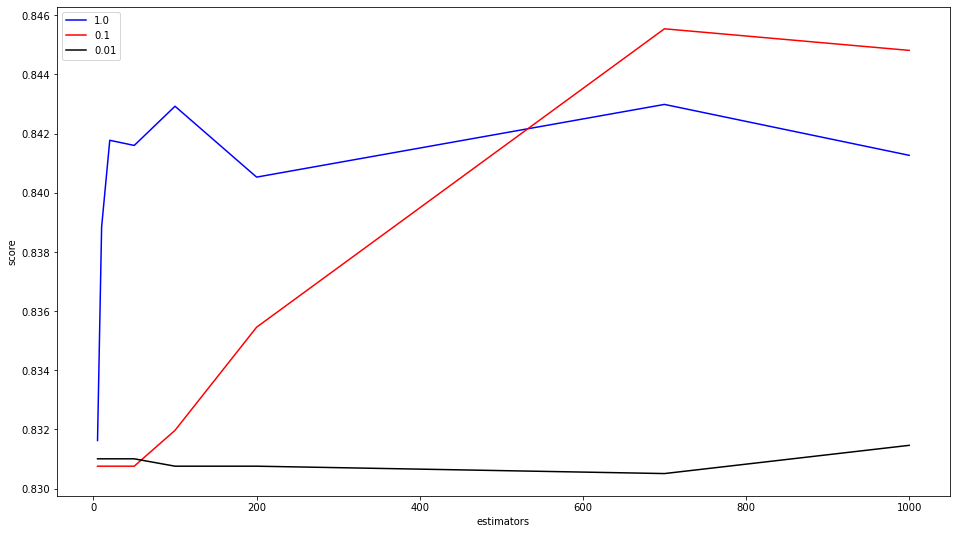

In [130]:
fig, ax = plt.subplots()
colors = ["blue", "red", "black"]
lrs = [1.0, 0.1, 0.01]
for i in range(scores_pd.shape[1]):
    ax.plot(scores_pd.iloc[:, i], color=colors[i], label=lrs[i])
ax.set_xlabel('estimators')
ax.set_ylabel('score')
ax.legend()
plt.show()

In [142]:
cat_boost_model = CatBoostClassifier(iterations=50,
                                             learning_rate=1,
                                             cat_features = cat_cols)
cat_boost_model.fit(X_train, y_train)
feat = cat_boost_model.feature_importances_

0:	learn: 0.3512145	total: 15.7ms	remaining: 768ms
1:	learn: 0.3017133	total: 31.6ms	remaining: 758ms
2:	learn: 0.2870740	total: 51.4ms	remaining: 806ms
3:	learn: 0.2850718	total: 72.5ms	remaining: 834ms
4:	learn: 0.2791481	total: 93ms	remaining: 837ms
5:	learn: 0.2745826	total: 112ms	remaining: 821ms
6:	learn: 0.2739367	total: 122ms	remaining: 752ms
7:	learn: 0.2705570	total: 141ms	remaining: 741ms
8:	learn: 0.2692905	total: 161ms	remaining: 736ms
9:	learn: 0.2669782	total: 180ms	remaining: 720ms
10:	learn: 0.2654067	total: 199ms	remaining: 707ms
11:	learn: 0.2629947	total: 220ms	remaining: 697ms
12:	learn: 0.2610287	total: 239ms	remaining: 679ms
13:	learn: 0.2592928	total: 270ms	remaining: 693ms
14:	learn: 0.2577881	total: 290ms	remaining: 677ms
15:	learn: 0.2551629	total: 309ms	remaining: 656ms
16:	learn: 0.2534515	total: 329ms	remaining: 639ms
17:	learn: 0.2504901	total: 348ms	remaining: 618ms
18:	learn: 0.2487630	total: 366ms	remaining: 598ms
19:	learn: 0.2477303	total: 385ms	rema

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

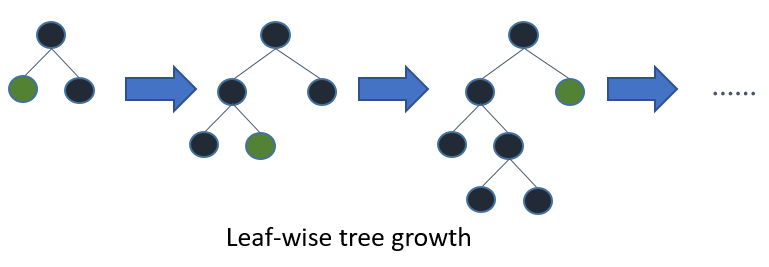

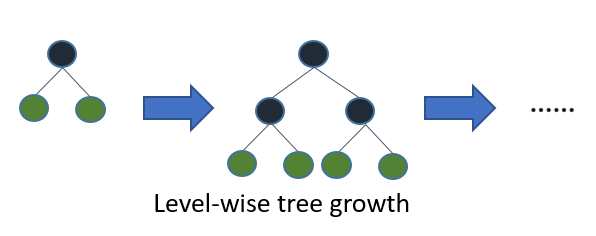

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [149]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [152]:
data = pd.read_csv('vehicle_insurance.csv')

cat_cols = data.loc[:, np.object == data.dtypes].columns
num_cols = data.loc[:, np.object != data.dtypes].columns

col_to_cat = ['Driving_License']
cat_cols = np.append(cat_cols, col_to_cat)
num_cols = list(set(num_cols) - set(col_to_cat))

data = pd.concat([data, pd.get_dummies(data[cat_cols], drop_first=True)], axis=1).drop(cat_cols, axis=1)
data

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,24,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,14.0,1,25426.0,152.0,247,0,0,1,0,0


In [153]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [163]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

model = LGBMClassifier()
grid_search = GridSearchCV(model, 
                           params,
                           scoring='precision',)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 3, 5, 100],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='precision')

In [167]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8853    0.9983    0.9384      1770
           1     0.2500    0.0043    0.0085       230

    accuracy                         0.8840      2000
   macro avg     0.5676    0.5013    0.4735      2000
weighted avg     0.8122    0.8840    0.8315      2000

